In [1]:
# from before

def pattern_count(symbol, genome):
    count = 0
    for i in range(len(genome)-len(symbol)+1):
        if genome[i:i+len(symbol)] == symbol:
            count = count+1
    return count


# Number of occurrences of C (base) in a window of extended_genome

def slow_symbol_array(genome, symbol):
    array = {}
    n = len(genome)
    extended_genome = genome + genome[0:n//2]
    for i in range(n):
        array[i] = pattern_count(symbol, extended_genome[i:i+(n//2)])
    return array

print("Toy example: ", slow_symbol_array("AAAAGGGG", "A"))

# Genome equal to the E. coli genome and symbol equal to "C"

"""
Why is slow_symbol_array inefficient? Its for loop makes n = len(genome) iterations. 
Then, to compute pattern_count(symbol, extended_genome[i:i+(n//2)]), 
we must compare symbol against n//2 symbols of extended_genome. 
As a result, we require a total of n2//2 comparisons to execute slow_symbol_array(genome, symbol). 
For a bacterial genome such as E. coli, which contains over 4.5 million nucleotides, 
we will need to execute over ten trillion symbol comparisons in order to generate a symbol array, 
which could take several days on a fast home computer operating several million comparisons per second.
"""

'''

f = open('E_coli.txt', 'r')
e_coli_genome = f.read()
symbol = "C"

from datetime import datetime
startTime = datetime.now()

print("Symbol array for genome equal to the E. coli genome and symbol equal to \"C\"", slow_symbol_array(e_coli_genome, symbol))

print(datetime.now() - startTime)

f.close()
'''

Toy example:  {0: 4, 1: 3, 2: 2, 3: 1, 4: 0, 5: 1, 6: 2, 7: 3}


'\n\nf = open(\'E_coli.txt\', \'r\')\ne_coli_genome = f.read()\nsymbol = "C"\n\nfrom datetime import datetime\nstartTime = datetime.now()\n\nprint("Symbol array for genome equal to the E. coli genome and symbol equal to "C"", slow_symbol_array(e_coli_genome, symbol))\n\nprint(datetime.now() - startTime)\n\nf.close()\n'

In [2]:
"""
Solution: Generate a symbol array using only one pass down ExtendedGenome and therefore only n+(n//2) total symbol comparisons
"""

def symbol_array(genome, symbol):
    array = {}
    n = len(genome)
    extended_genome = genome + genome[0:n//2]

    # look at the first half of Genome to compute first array value
    array[0] = pattern_count(symbol, genome[0:n//2])

    for i in range(1, n):
        # start by setting the current array value equal to the previous array value
        array[i] = array[i-1]

        # the current array value can differ from the previous array value by at most 1
        if extended_genome[i-1] == symbol:
            array[i] = array[i]-1
        if extended_genome[i+(n//2)-1] == symbol:
            array[i] = array[i]+1
    return array


with open('E_coli.txt') as file:
    e_coli = file.read();

symbol = "C"

from datetime import datetime
startTime = datetime.now()
array = symbol_array(e_coli, symbol)
print("Time to comb through E. Coli genome: ", datetime.now() - startTime)

print("First entry on symbol array for genome equal to the E. coli genome and symbol equal to \"C\": ", array[0])
print("Length of symbol array of E. Coli genome: ", len(array))


Time to comb through E. Coli genome:  0:00:03.407907
First entry on symbol array for genome equal to the E. coli genome and symbol equal to "C":  579589
Length of symbol array of E. Coli genome:  4639675


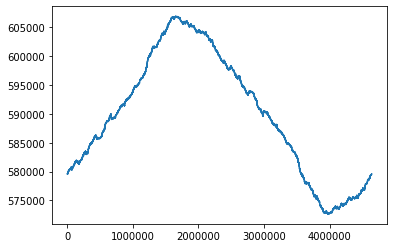

In [10]:
"""
The maximum value of the array occurs around position 1600000, 
and the minimum value of the array occurs around position 4000000. 
We can therefore infer that the reverse half-strand begins around position 1600000, 
and that the forward half-strand begins around position 4000000. 
Because we know that ori occurs where the reverse half-strand transitions to the forward half-strand, 
we have discovered that ori is located in the neighborhood of position 4000000 of the E. coli genome
"""


with open('E_coli.txt') as file:
    e_coli = file.read();

array = symbol_array(e_coli, "C")

import matplotlib.pyplot as plt
plt.plot(*zip(*sorted(array.items())))
plt.show()

In [4]:

# Input:  A String Genome
# Output: The skew array of Genome as a list.
def skew_array(genome):
    # your code here
    skew = [0] * (len(genome)+1)
    for i, e in enumerate(genome):
        if genome[i] == 'A' or genome[i] == 'T':
            skew[i+1] = skew[i]            
        elif genome[i] == 'G':
            skew[i+1] = skew[i] + 1
        elif genome[i] == 'C':
            skew[i+1] = skew[i] - 1
        else:
            return "ERROR: Encountered a non-valid base."
    return skew

with open('E_coli.txt') as file:
    e_coli_genome = file.read();

from datetime import datetime
startTime = datetime.now()
skew_array_e_coli = skew_array(e_coli_genome)
print("Time to range E. Coli genome: ", datetime.now() - startTime)

# Get last value
print(skew_array_e_coli[-1])

Time to range E. Coli genome:  0:00:01.568481
-2631


In [5]:
# Alternative:

def skew(genome):
    g_minus_c_score = [0]
    count_dict = {"A":0, "T":0, "C":-1, "G":1}
    for i in range(1,len(genome)+1):
            g_minus_c_score.append(count_dict[genome[i-1]] + g_minus_c_score[i-1])
    return g_minus_c_score

with open('E_coli.txt') as file:
    e_coli_genome = file.read();

from datetime import datetime
startTime = datetime.now()
skew_e_coli = skew(e_coli_genome)
print("Time to range E. Coli genome: ", datetime.now() - startTime)

# Get last value
print(skew_e_coli[-1])

Time to range E. Coli genome:  0:00:01.645668
-2631


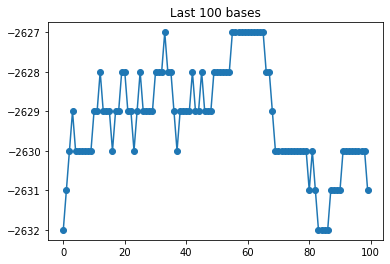

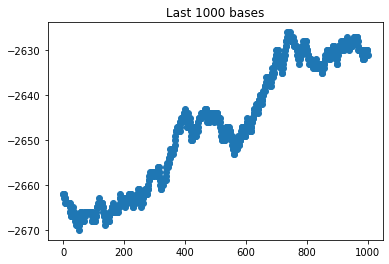

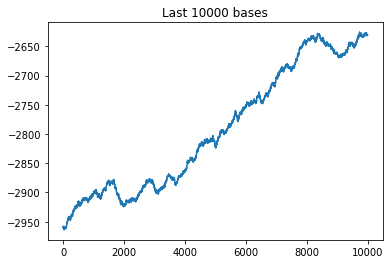

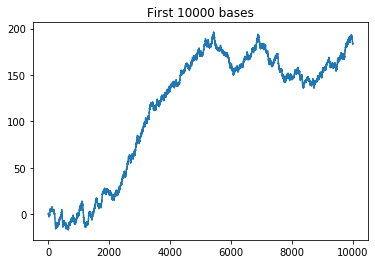

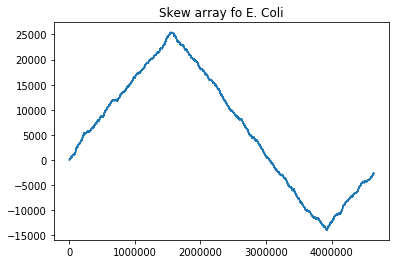

Time to plot E. Coli genome skew array:  0:00:01.579527


In [15]:
# Plot skew diagram:
import matplotlib.pyplot as plt

# Only last 100 items
plt.plot(skew_array_e_coli[-100:], marker='o')
plt.title('Last 100 bases')
plt.show()

# Only last 1000 items
plt.plot(skew_array_e_coli[-1000:], marker='o')
plt.title('Last 1000 bases')
plt.show()

# Last 10000 items
plt.plot(skew_array_e_coli[-10000:])
plt.title('Last 10000 bases')
plt.show()

# First 10000 items
plt.plot(skew_array_e_coli[:10000])
plt.title('First 10000 bases')
plt.show()

# All
from datetime import datetime
startTime = datetime.now()

plt.plot(skew_array_e_coli)
plt.title('Skew array fo E. Coli')
plt.show()

print("Time to plot E. Coli genome skew array: ", datetime.now() - startTime)


In [17]:
# E. coli achieves maximum and minimum skew positions 
print("Maximum skew position: ", skew_array_e_coli.index(max(skew_array_e_coli)))
print("Minimum skew position: ", skew_array_e_coli.index(min(skew_array_e_coli)))

"""
Forward (lagging) => difference between G and C decreases 
Reverse (leading) => difference between G and C increases

Therefore, Ori islocated at position 3923620 (whre the difference between G and C stops decreasing and it starts increasing)

Ori -> Min of skew array
"""

Maximum skew position:  1550413
Minimum skew position:  3923620


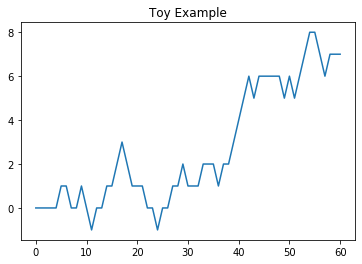

Toy example:  [11, 24]
Minimum values for difference between G and C in E. Coli genome:  [3923620, 3923621, 3923622, 3923623]


In [21]:
def min_skew(genome):
    min_positions = []
    skew = skew_array(genome)
    min_skew_array = min(skew)
    for i, e in enumerate(skew):
        if e == min_skew_array:
            min_positions.append(i)
    return min_positions


plt.plot(skew_array("TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT"))
plt.title('Toy Example')
plt.show()
print("Toy example: ", min_skew("TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT"))

# E. Coli
with open('E_coli.txt') as file:
    e_coli_genome = file.read();
print("Minimum values for difference between G and C in E. Coli genome: ", min_skew(e_coli_genome))


In [26]:
"""
Solving the Minimum Skew Problem now provides us with an approximate location of ori at position 3923620 in E. coli. 
In an attempt to confirm this hypothesis, 
let’s look for a hidden message representing a potential DnaA box near this location. 
Solving the Frequent Words Problem in a window of length 500 starting at position 3923620 
reveals no 9-mers (along with their reverse complements) that appear three or more times.
(The maximum frequency for 9-mers is 2 for 'AAGGATCCG', and 'AGGATCCGG')
"""
## FROM BEFORE
def frequent_words(genome, k):
    words = []
    freq = frequency_map(genome, k)
    m = max(freq.values())
    for key in freq:
        # add each key to words whose frequency value is equal to m
        if freq[key] == m:   
            words.append(key)
    return m, words

def frequency_map(genome, k):
    freq = {}
    n = len(genome)
    for i in range(n-k+1):
        pattern = genome[i:i+k]
        freq[pattern] = 0
        # frequency map
        for i in range(n-k+1):
            if pattern == genome[i:i+k]:
                freq[pattern] += 1
    return freq

k = 9 # looking for 9-mers
init_position = 3923620
window_length = 500
final_position = init_position + window_length

print("Maximum frequency: %d, for these 9-mers: %s" % (frequent_words(e_coli_genome[init_position:final_position], k)))

Maximum frequency: 2, for these 9-mers: ['AAGGATCCG', 'AGGATCCGG']


In [38]:
"""
Before we give up, let’s examine the ori of Vibrio cholerae one more time to see if it provides us 
with any insights on how to alter our algorithm to find DnaA boxes in E. coli. 
You may have noticed that in addition to the three occurrences of ATGATCAAG 
and three occurrences of its reverse complement CTTGATCAT, 
the Vibrio cholerae ori contains additional occurrences of ATGATCAAC and CATGATCAT, 
which differ from ATGATCAAG and CTTGATCAT in only a single nucleotide.

Finding eight approximate occurrences of our target 9-mer and its reverse complement in a short region is 
even more statistically surprising than finding the six exact occurrences of 
ATGATCAAG and its reverse complement CTTGATCAT that we stumbled upon in the beginning of our investigation. 
Furthermore, the discovery of these approximate 9-mers makes sense biologically, 
since DnaA can bind not only to “perfect” DnaA boxes but to their slight modifications as well.
"""

'''
Position i in k-mers p and q is a mismatch if the symbols at position i of the two strings are not the same. 
The total number of mismatches between strings p and q is called the Hamming distance
'''

def hamming_distance(p, q):
    # check strings of equal length:
    if len(p) != len(q):
        return "ERROR: strings must be equal length"
    mismatch_count = 0
    for i, c in enumerate(p):
        if c != q[i]:
            mismatch_count += 1
    return mismatch_count

print("Toy hamming distance example: ", hamming_distance("GGGCCGTTGGT", "GGACCGTTGAC"))



# Input:  Strings Pattern and Text along with an integer d
# Output: A list containing all starting positions where Pattern appears
# as a substring of Text with at most d mismatches

def approximate_pattern_matching(text, pattern, d):
    positions = [] # initializing list of positions
    # your code here
    for i in range(len(text)-len(pattern)+1):
        if text[i:i+len(pattern)] == pattern:
            positions.append(i)
        elif hamming_distance(pattern, text[i:i+len(pattern)]) <= d:
            positions.append(i)
    return positions

text = "CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT"
pattern = "ATTCTGGA"
d = 3
print("Toy approx. pattern matching example: ", approximate_pattern_matching(text, pattern, d))



Toy hamming distance example:  3
Toy approx. pattern matching example:  [6, 7, 26, 27]
Toy approx. pattern count example:  0


In [4]:
def hamming_distance(p, q):
    # check strings of equal length:
    if len(p) != len(q):
        return "ERROR: strings must be equal length"
    mismatch_count = 0
    for i, c in enumerate(p):
        if c != q[i]:
            mismatch_count += 1
    return mismatch_count

# Input:  Strings Pattern and Text, and an integer d
# Output: The number of times Pattern appears in Text with at most d mismatches

def approximate_pattern_count(text, pattern, d):
    count = 0 # initialize count variable
    for i in range(len(text)-len(pattern)+1):
        if text[i:i+len(pattern)] == pattern:
            count += 1
        elif hamming_distance(pattern, text[i:i+len(pattern)]) <= d:
            count += 1
    return count

text = "TTTAGAGCCTTCAGAGG"
pattern = "GAGG"
d = 2
print("Toy approx. pattern count example: ", approximate_pattern_count(text, pattern, d))

Toy approx. pattern count example:  4


In [95]:
"""
Identify the most frequent 9-mers (with 1 mismatch) 
within a window of length 500 starting at position 3923620 of the E. coli genome.
"""

def frequent_words(genome, k, d, n = 1):
    words = []
    freq = complementary_frequency(genome, k, d)
    m = max(freq.values())
    for key in freq:
        if freq[key] == m:   
            words.append(key)
        if n == 2:
            # add each key to words whose frequency value is equal to m or m - 1
            if freq[key] == m-1:
                words.append(key)
    if n == 1:
        return words, m
    if n == 2:
        return words, m, m-1
    

def complementary_frequency(genome, k, d):
    comp_freq = {}
    n = len(genome)
    for i in range(n-k+1):
        pattern = genome[i:i+k]
        comp = reverse_complement(pattern)
        comp_freq[(pattern, comp)] = 0
        for i in range(n-k+1):
            if pattern == genome[i:i+k] or comp == genome[i:i+k]:
                comp_freq[(pattern, comp)] += 1
            elif hamming_distance(pattern, genome[i:i+k]) <= d or hamming_distance(comp, genome[i:i+k]) <= d:
                comp_freq[(pattern, comp)] += 1
    
    # Get rid of pattern/complement already accounted for
    comp_freq = clean_comp_pairs(comp_freq)
    
    return comp_freq
    

def hamming_distance(p, q):
    # check strings of equal length:
    if len(p) != len(q):
        return "ERROR: strings must be equal length"
    mismatch_count = 0
    for i, c in enumerate(p):
        if c != q[i]:
            mismatch_count += 1
    return mismatch_count

def clean_comp_pairs(comp_freq):
    for tuple_key in list(comp_freq.keys()):
        done_pattern = tuple_key[0]
        for t_k in list(comp_freq.keys()):
            if t_k[0] == reverse_complement(done_pattern) and t_k[1] == done_pattern:
                del comp_freq[tuple_key]
    return comp_freq

def reverse_complement(DNA_pattern):   
    DNA_pattern = reverse_bases(DNA_pattern) # reverse all letters in a string
    DNA_pattern = complement_bases(DNA_pattern) # complement each letter in a string
    return DNA_pattern

def reverse_bases(DNA_pattern):
    return DNA_pattern[::-1]

def complement_bases(DNA_pattern):
    basepairs = {"A":"T", "G":"C", "T":"A", "C":"G"}
    complement = ""
    for base in DNA_pattern:
        complement += basepairs.get(base)
    return complement


def clean_genome(raw_genome):
    return raw_genome.upper().replace(" ", "")


def printing_results(freq_words_output):
    if len(freq_words_output) == 3:
        mer_list, highest_freq, second_highest_freq = freq_words_output
        print("Two highest frequencies: %d, %d; for these 9-mers: %s" % (highest_freq, second_highest_freq, mer_list))
    elif len(freq_words_output) == 2:
        print("The highest frequency: %d; for the 9-mers: %s" % (freq_words_output[1], freq_words_output[0]))


k = 9 # looking for 9-mers
d = 1
#n = 2

init_position = 3923620
window_length = 500
final_position = init_position + window_length

with open('E_coli.txt') as file:
    e_coli_genome = file.read();


printing_results(frequent_words(e_coli_genome[init_position:final_position], k, d, n))

    
# checking toy example (same as e. coli  :p  ):
print()
raw_genome = "aatgatgatgacgtcaaaaggatccggataaaac atggtgattgcctcgcataacgcggtatgaaaatggattgaagcccgggccgtggattctactcaactttgtcggcttgagaaagacctgggatcctgggtattaaaaagaagatctatttatttagagatctgttctattgtgatctcttattaggatcgcactgcccTGTGGATAAcaaggatccggcttttaagatcaacaacctggaaaggatcattaactgtgaatgatcggtgatcctggaccgtataagctgggatcagaatgaggggTTATACACAactcaaaaactgaacaacagttgttcTTTGGATAActaccggttgatccaagcttcctgacagagTTATCCACAgtagatcgcacgatctgtatacttatttgagtaaattaacccacgatcccagccattcttctgccggatcttccggaatgtcgtgatcaagaatgttgatcttcagtg"
given_genome = clean_genome(raw_genome)

printing_results(frequent_words(given_genome, k, d, n))
    
# looking for TTATCCACA or its complement TGTGGATAA 
print()

frequent_list = frequent_words(given_genome, k, d)[0]

for e in frequent_list:
    if 'TTATCCACA' in e or 'TGTGGATAA' in e:
        print()
        print(e)
        print("index ", frequent_list.index(e))




The highest frequency: 4; for the 9-mers: [('GGATCCTGG', 'CCAGGATCC'), ('AGCTGGGAT', 'ATCCCAGCT'), ('CTGGGATCA', 'TGATCCCAG'), ('GTTATCCAC', 'GTGGATAAC'), ('TTATCCACA', 'TGTGGATAA'), ('GATCCCAGC', 'GCTGGGATC')]

The highest frequency: 4; for the 9-mers: [('GGATCCTGG', 'CCAGGATCC'), ('AGCTGGGAT', 'ATCCCAGCT'), ('CTGGGATCA', 'TGATCCCAG'), ('GTTATCCAC', 'GTGGATAAC'), ('TTATCCACA', 'TGTGGATAA'), ('GATCCCAGC', 'GCTGGGATC')]


('TTATCCACA', 'TGTGGATAA')
index  4
